### **Импорт библиотек**

In [62]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

### **Импорт датасета**

In [44]:
df_train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/test.csv')

### **EDA**

Тренировочный сет

In [4]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.tail()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0
4208,8417,110.85,z,r,ae,c,d,aa,g,w,...,1,0,0,0,0,0,0,0,0,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_train.shape

(4209, 378)

Тестовый датасет

In [9]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
df_test.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
4208,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [12]:
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_test.shape

(4209, 377)

### **Преобразование данных**

Обработка пропущенных значений

In [61]:
for col in df_train.columns:
  if df_train[col].isnull().sum():
    print(f'{col}')

for col in df_test.columns:
  if df_test[col].isnull().sum():
    print(f'{col}')
# Пропущенных значений нет

Удаление дубликатов

In [46]:
df_train.duplicated().sum()
df_test.duplicated().sum()

np.int64(0)

Удаление столбца ID

In [47]:
df_train.drop(['ID'], inplace=True, axis=1)
df_test.drop(['ID'], inplace=True, axis=1)

Кодирование категориальных признаков

In [48]:
X = df_train.drop(['y'], axis=1)
Y = df_train['y']
X_columns = X.columns
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
encoder = OneHotEncoder(sparse_output=False)
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
encoded_features = encoder.fit_transform(X[categorical_columns])
encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

X.drop(categorical_columns, inplace=True, axis=1)
X = pd.concat([X, encoded_features], axis=1)

In [50]:
X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4205,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4206,0,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4207,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### **Тренировка сети**

Разбивка выборки

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

Инициализация модели

In [52]:
model1 = keras.Sequential([
        layers.Input(shape=(X.shape[1],)),

        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.6),

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

In [118]:
# Модель использованая при подборе параметров и слоев. Игнорировать
# model2 = keras.Sequential([
#         layers.Input(shape=(X.shape[1],)),

#         layers.Dense(512, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.5),

#         layers.Dense(256, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.4),

#         layers.Dense(128, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.3),

#         layers.Dense(64, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.2),

#         layers.Dense(32, activation='relu'),
#         layers.Dense(1)
#       ])

In [28]:
# Модель использованая при подборе параметров и слоев. Игнорировать
# model3 = keras.Sequential([
#         layers.Input(shape=(X.shape[1],)),
#         layers.Dense(256, activation='swish'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.3),

#         layers.Dense(128, activation='swish'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.2),

#         layers.Dense(64, activation='swish'),
#         layers.Dense(1)
# ])

Компиляция модели

In [53]:
model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss='mse',
    metrics=['mae']
)

In [54]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1024)           │       577,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,505 (4.90 MB)

 Trainable params: 1,281,473 (4.89 MB)

 Non-trainable params: 4,032 (15.75 KB)

Обучение модели

In [55]:
history = model1.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    verbose=1)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 10306.7783 - mae: 100.6708 - val_loss: 10093.0713 - val_mae: 99.6924
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 9972.1016 - mae: 99.1070 - val_loss: 9336.0908 - val_mae: 95.9403
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 9341.4072 - mae: 96.0126 - val_loss: 7769.5732 - val_mae: 87.3437
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8234.5771 - mae: 89.9660 - val_loss: 5520.1450 - val_mae: 72.9000
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6590.5435 - mae: 79.9607 - val_loss: 3188.3513 - val_mae: 53.6721
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4603.9683 - mae: 65.8196 - val_loss: 1482.9625 - val_mae: 30.2502
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2950.0042 - mae: 50.7649 - val_loss: 959.3384 - val_mae: 21.3827
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 1647.7378 - mae: 36.1018 - val_loss: 757.1449 - val_mae:

In [57]:
train_loss, train_mae = model1.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model1.evaluate(X_test, y_test, verbose=0)

print(f"Training MSE: {train_loss:.4f}, Training MAE: {train_mae:.4f}")
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


Training MSE: 66.5117, Training MAE: 4.9595
Test MSE: 64.6553, Test MAE: 5.3309


Предсказание

In [63]:
y_pred = model1.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Prediction RMSE: {rmse:.4f}")
print(f"Prediction MSE: {mse:.4f}")
print(f"Prediction R² Score: {r2:.4f}")
print(f"Prediction MAE: {mae:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Prediction RMSE: 8.0408
Prediction MSE: 64.6553
Prediction R² Score: 0.5846
Prediction MAE: 5.3309


### **Resediual plot**

In [59]:
predictions = pd.DataFrame({'True': y_test, 'Pred': y_pred})
predictions

,True,Pred
1073,97.94,93.862411
144,96.41,94.846184
2380,105.83,114.969749
184,79.09,77.968369
2587,108.69,112.333832
...,...,...
657,113.68,112.079422
3975,88.85,93.303703
907,89.60,96.714851
3597,89.23,96.323875


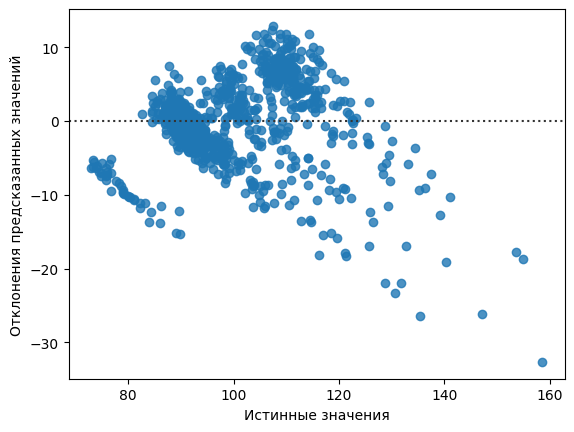

In [69]:
sns.residplot(x='True', y='Pred', data=predictions)
plt.xlabel("Истинные значения")
plt.ylabel("Отклонения предсказанных значений")
plt.show()

### **Графики потерь и метрик во время обучения**

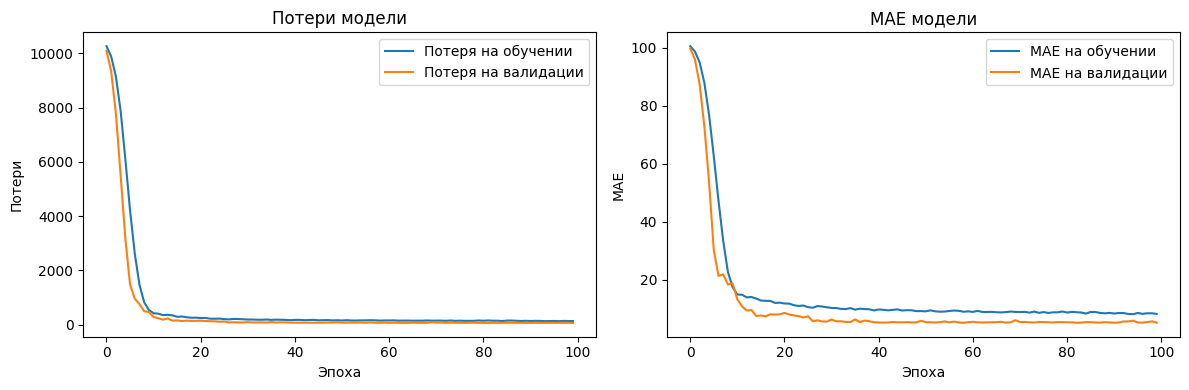

In [68]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потеря на обучении')
plt.plot(history.history['val_loss'], label='Потеря на валидации')
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE на обучении')
plt.plot(history.history['val_mae'], label='MAE на валидации')
plt.title('MAE модели')
plt.ylabel('MAE')
plt.xlabel('Эпоха')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()